In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image

In [37]:
img = cv2.imread('A.png',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Translation



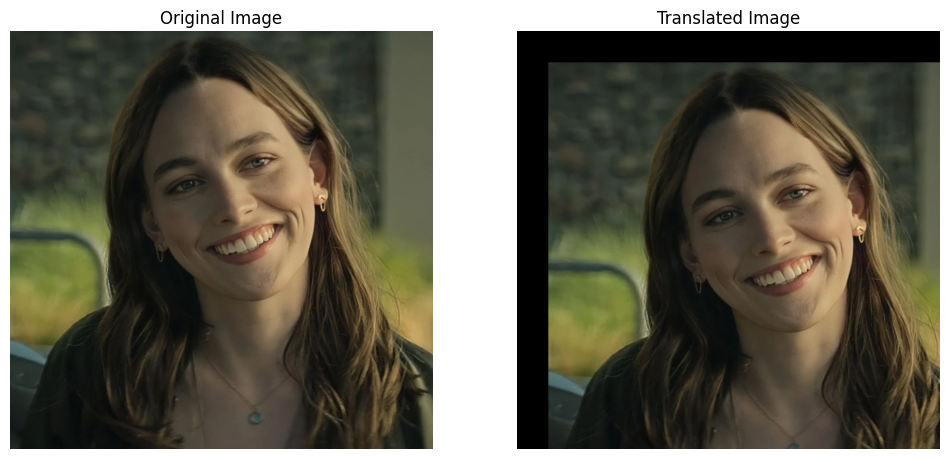

In [38]:
height, width = img.shape[:2]

# Set translation amounts
tx, ty = 80, 80

# Create a grid of (x, y) coordinates
y_indices, x_indices = np.indices((height, width))

# Flatten the indices and create homogeneous coordinates
ones = np.ones_like(x_indices.flatten())
coords = np.stack([x_indices.flatten(), y_indices.flatten(), ones])

# Create the translation matrix
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

# Apply the translation matrix to the coordinates
translated_coords = translation_matrix @ coords
translated_x, translated_y = translated_coords[0].astype(int), translated_coords[1].astype(int)

# Create an empty output image with the same dimensions
translated_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map the original image pixels to the translated image
mask = (
    (translated_y >= 0) & (translated_y < height) &
    (translated_x >= 0) & (translated_x < width)
)
translated_image[translated_y[mask], translated_x[mask]] = img[y_indices.flatten()[mask], x_indices.flatten()[mask]]

output_image = Image.fromarray(translated_image)
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('Off')
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Translated Image')
plt.axis('Off')
plt.show()

# Rotation

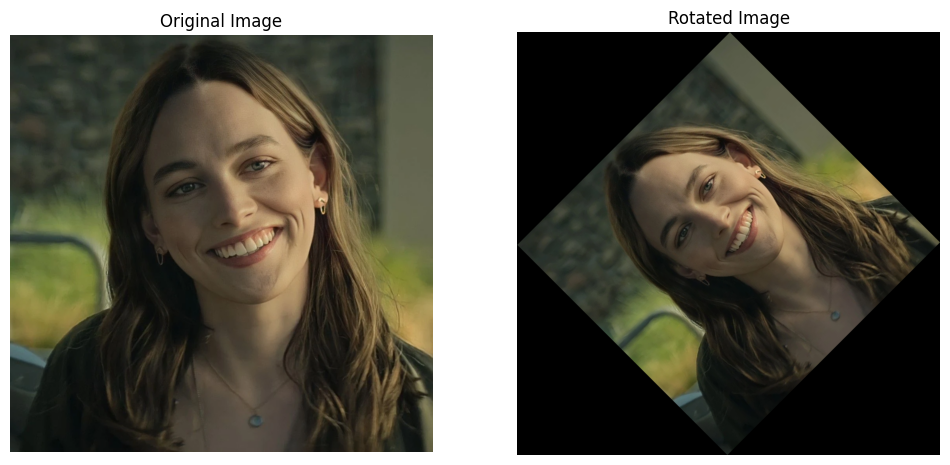

In [39]:
height, width = img.shape[:2]

# Set rotation amount
rotation_amount_degree = 45
rotation_amount_rad = np.deg2rad(rotation_amount_degree)

# Calculate the new canvas size to fit the rotated image
new_height = int(np.ceil(np.sqrt(height**2 + width**2)))
new_width = new_height

# Create a grid of (x, y) coordinates for the new canvas
y_indices, x_indices = np.indices((new_height, new_width))

# Calculate the center of the new canvas
new_center = (new_width // 2, new_height // 2)

# Translate the grid to have the center at (0, 0)
x_indices_centered = x_indices - new_center[0]
y_indices_centered = y_indices - new_center[1]

# Create homogeneous coordinates
ones = np.ones_like(x_indices_centered)
coords = np.stack([x_indices_centered.flatten(), y_indices_centered.flatten(), ones.flatten()])

# Create the rotation matrix
cos_a = np.cos(rotation_amount_rad)
sin_a = np.sin(rotation_amount_rad)
rotation_matrix = np.array([
    [cos_a, -sin_a, 0],
    [sin_a, cos_a, 0],
    [0, 0, 1]
])

# Apply the rotation matrix to the coordinates
rotated_coords = rotation_matrix @ coords
rotated_x, rotated_y = rotated_coords[0] + width // 2, rotated_coords[1] + height // 2

# Create an empty output image with new dimensions
rotated_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

# Map the original image pixels to the rotated image
mask = (
    (rotated_y >= 0) & (rotated_y < height) &
    (rotated_x >= 0) & (rotated_x < width)
)
rotated_image[y_indices.flatten()[mask], x_indices.flatten()[mask]] = img[rotated_y[mask].astype(int), rotated_x[mask].astype(int)]

output_image = Image.fromarray(rotated_image)
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('Off')
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Rotated Image')
plt.axis('Off')
plt.show()


# Scaling

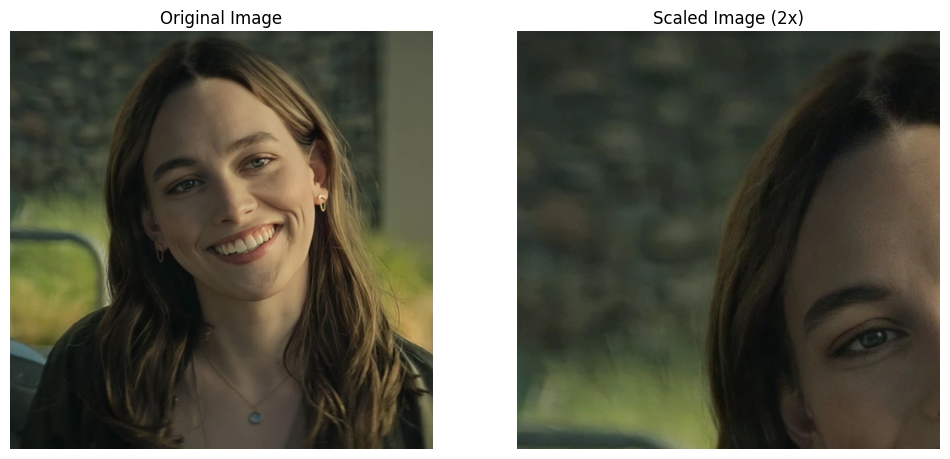

In [40]:
image = cv2.imread("A.png")
rows, cols, channels = image.shape

scale_x, scale_y = 2.0, 2.0

new_width = int(cols * scale_x)
new_height = int(rows * scale_y)

x_new = np.linspace(0, cols - 1, new_width)
y_new = np.linspace(0, rows - 1, new_height)

x_old, y_old = np.meshgrid(np.floor(x_new / scale_x).astype(int),
                           np.floor(y_new / scale_y).astype(int))

x_old = np.clip(x_old, 0, cols - 1)
y_old = np.clip(y_old, 0, rows - 1)

scaled_image = image[y_old, x_old]

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('Off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image (2x)")
plt.axis('Off')
plt.show()

# Shearing

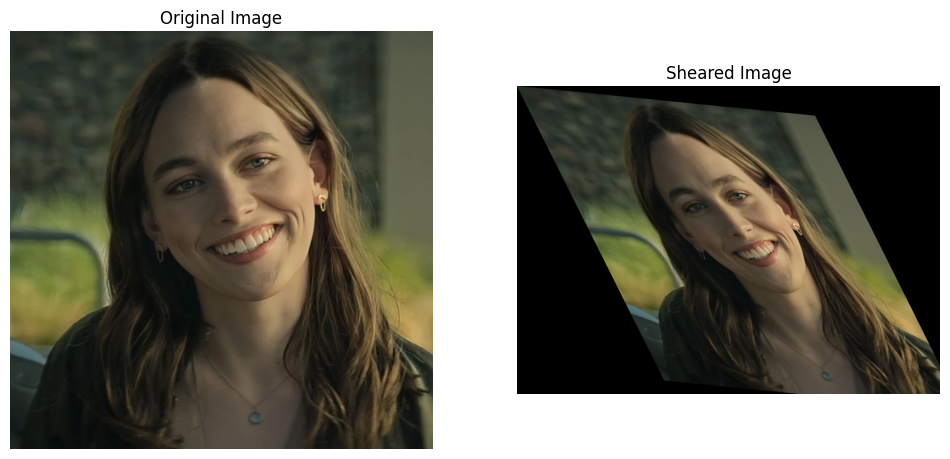

In [41]:
def shear_image(image_path, shear_x=0, shear_y=0):
    # Open the image using PIL
    image = Image.open(image_path)
    original_width, original_height = image.size
    img_array = np.array(image)
    
    # Create an empty array for the sheared image
    new_width = original_width + int(shear_x * original_height)
    new_height = original_height + int(shear_y * original_width)
    sheared_image_array = np.zeros((new_height, new_width, img_array.shape[2]), dtype=np.uint8)
    
    # Loop through every pixel of the new image and map it to the original image
    for i in range(new_height):
        for j in range(new_width):
            # Calculate the original coordinates using the shear matrix transformations
            orig_x = int(j - shear_x * i)
            orig_y = int(i - shear_y * j)
            
            # Ensure the coordinates are within bounds of the original image
            if 0 <= orig_x < original_width and 0 <= orig_y < original_height:
                sheared_image_array[i, j] = img_array[orig_y, orig_x]
    
    # Convert the result array to an image and return it
    sheared_image = Image.fromarray(sheared_image_array)
    return sheared_image

sheared_image = shear_image("A.png", shear_x=0.5, shear_y=0.1) 

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('Off')
plt.subplot(1, 2, 2)
plt.imshow(sheared_image)
plt.title('Sheared Image')
plt.axis('Off')
plt.show()

# Reflection

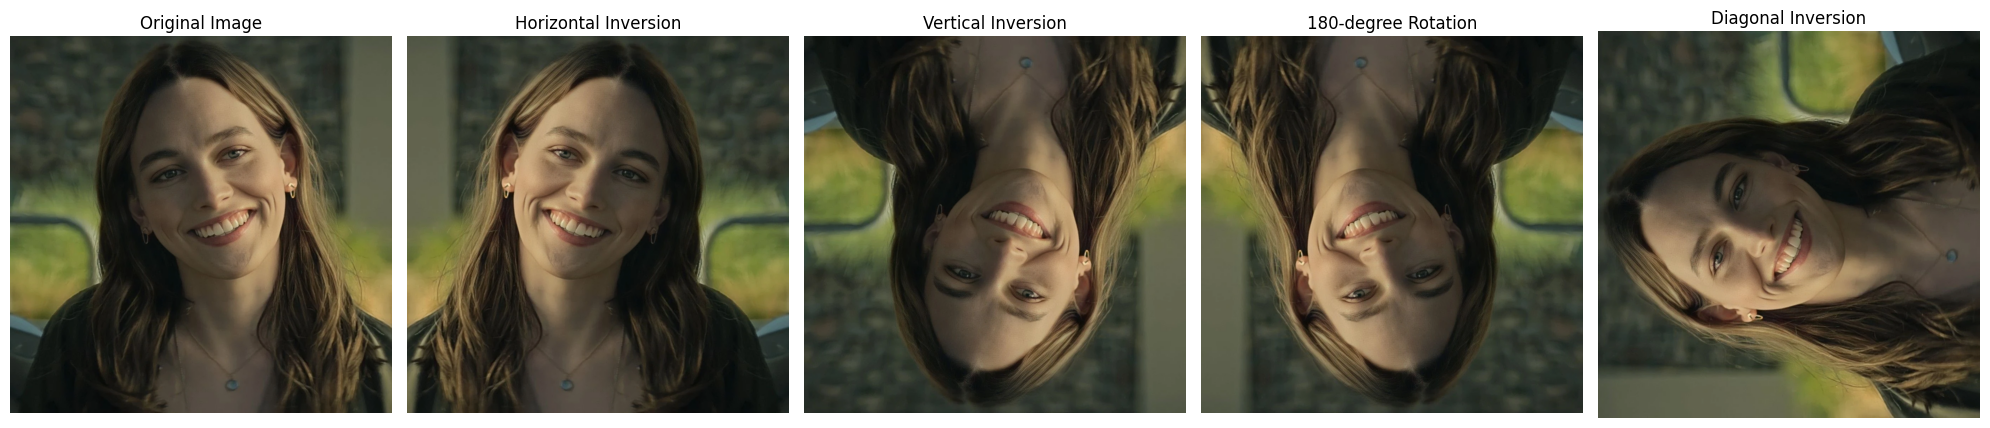

In [43]:
def apply_inversions(image_path):
    image = Image.open(image_path)
    img_array = np.array(image)
    
    # Step 1: Horizontal Inversion (Mirror horizontally)
    horizontal_inversion = np.flip(img_array, axis=1)
    
    # Step 2: Vertical Inversion (Mirror vertically)
    vertical_inversion = np.flip(img_array, axis=0)
    
    # Step 3: 180-degree Rotation
    rotated_180 = np.flip(img_array, axis=(0, 1))
    
    # Step 4: Diagonal Inversion (Reflect across the main diagonal)
    diagonal_inversion = np.transpose(img_array, axes=(1, 0, 2))  # Transpose the image matrix
    
    return img_array, horizontal_inversion, vertical_inversion, rotated_180, diagonal_inversion

image_path = "A.png"
original, horizontal, vertical, rotated_180, diagonal = apply_inversions(image_path)

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# Display original image
axes[0].imshow(original)
axes[0].set_title("Original Image")
axes[0].axis('off')  # Hide axes

# Display horizontal inversion
axes[1].imshow(horizontal)
axes[1].set_title("Horizontal Inversion")
axes[1].axis('off')

# Display vertical inversion
axes[2].imshow(vertical)
axes[2].set_title("Vertical Inversion")
axes[2].axis('off')

# Display 180-degree rotation
axes[3].imshow(rotated_180)
axes[3].set_title("180-degree Rotation")
axes[3].axis('off')

# Display diagonal inversion
axes[4].imshow(diagonal)
axes[4].set_title("Diagonal Inversion")
axes[4].axis('off')

plt.tight_layout()
plt.show()
